In [1]:
import pandas as pd
import numpy as np
import scipy.stats # 통계 함수 사용
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# 코렙 한글깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙에서 한글 깨짐 현상 있을때 설치 후 밑코드로 해결완료

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_excel('/content/drive/MyDrive/main_seoul_senior_data_주말제외.xlsx', thousands=',')
data.head(1)

,자치구,동,시설명,주소,연면적,위도,경도,위도UTMK,경도UTMK,도서관(500),...,병원(500),공원(500),버스(100),지하철(250),동별전체인구,60세~,60세~/전체인구,60세~/구별전체,비율,디지털정보지수
0,종로구,청운효자동,청운효자동 주민센터,서울특별시 종로구 자하문로 92,965.52,37.584083,126.970636,1.953680e+06,953451.030567,0.0,...,0.0,0.0,1.0,0.0,11978.0,2945.0,0.245867,0.075281,254736.239404,2933.53


In [5]:
data.shape

(509, 21)

In [6]:
data.columns

Index(['자치구', '동', '시설명', '주소', '연면적', '위도', '경도', '위도UTMK', '경도UTMK',
       '도서관(500)', '배움터(500)', '병원(500)', '공원(500)', '버스(100)', '지하철(250)',
       '동별전체인구', '60세~', '60세~/전체인구', '60세~/구별전체', '비율', '디지털정보지수'],
      dtype='object')

# 데이터 탐색

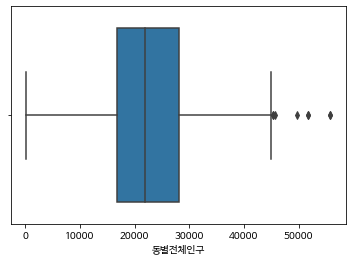

In [7]:
#데이터 탐색
sns.boxplot(x='동별전체인구' ,data = data)
plt.show()

In [8]:
data.columns = ['자치구', '동', '시설명', '주소', '연면적', '위도', '경도', '위도UTMK', '경도UTMK',
       '도서관(500)', '배움터(500)', '병원(500)', '공원(500)', '버스(100)', '지하철(250)',
       '동별전체인구', '동별시니어수', '행정동별시니어비율', '구별행정동시니어비율', '유동인구', '디지털정보지수']

In [9]:
#주변특성을 다 더한 데이터 df 생성 (버스 + 지하철도 합침)
df = data.copy() 
df.head(1)

,자치구,동,시설명,주소,연면적,위도,경도,위도UTMK,경도UTMK,도서관(500),...,병원(500),공원(500),버스(100),지하철(250),동별전체인구,동별시니어수,행정동별시니어비율,구별행정동시니어비율,유동인구,디지털정보지수
0,종로구,청운효자동,청운효자동 주민센터,서울특별시 종로구 자하문로 92,965.52,37.584083,126.970636,1.953680e+06,953451.030567,0.0,...,0.0,0.0,1.0,0.0,11978.0,2945.0,0.245867,0.075281,254736.239404,2933.53


In [10]:
data['유동인구'].sort_values(ascending = False)
#똑같은 이유 : 같은 동에 위치한 주민센터 및 복지관이라 

490    596536.798917
345    596536.798917
373    577056.488606
411    508282.818408
86     494977.746239
           ...      
3       71533.741936
23      60439.634003
17      36117.481737
351     23673.955487
412      2133.181677
Name: 유동인구, Length: 509, dtype: float64

In [11]:
# 이상치확인
q1 = df['유동인구'].quantile(0.25)
q3 = df['유동인구'].quantile(0.75)
iqr = q3-q1
rev_range = 3 #제거 범위 조절 변수 
df = df[(df['유동인구'] <= q3 + (rev_range*iqr) ) & (df['유동인구' ]>= q1 - (rev_range*iqr))]

In [12]:
df.shape, data.shape

((509, 21), (509, 21))

In [13]:
#df.drop(columns = ['위도', '경도','위도UTMK', '경도UTMK'], inplace = True)

In [14]:
df.columns

Index(['자치구', '동', '시설명', '주소', '연면적', '위도', '경도', '위도UTMK', '경도UTMK',
       '도서관(500)', '배움터(500)', '병원(500)', '공원(500)', '버스(100)', '지하철(250)',
       '동별전체인구', '동별시니어수', '행정동별시니어비율', '구별행정동시니어비율', '유동인구', '디지털정보지수'],
      dtype='object')

In [15]:
df.drop(columns = ['구별행정동시니어비율','연면적'], inplace = True)

In [16]:
df['주변특성'] = df['도서관(500)'] + df['배움터(500)'] + df['병원(500)'] + df['공원(500)']
df['대중교통'] = df['버스(100)'] + df['지하철(250)']

In [17]:
df.drop(columns = ['도서관(500)', '배움터(500)', '병원(500)',
       '공원(500)', '버스(100)', '지하철(250)'], inplace = True)

In [18]:
df.columns

Index(['자치구', '동', '시설명', '주소', '위도', '경도', '위도UTMK', '경도UTMK', '동별전체인구',
       '동별시니어수', '행정동별시니어비율', '유동인구', '디지털정보지수', '주변특성', '대중교통'],
      dtype='object')

In [19]:
df.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통
0,종로구,청운효자동,청운효자동 주민센터,서울특별시 종로구 자하문로 92,37.584083,126.970636,1.953680e+06,953451.030567,11978.0,2945.0,0.245867,254736.239404,2933.53,0.0,1.0


In [20]:
# feature 변수만 X 변수로 저장 
#X2 = df.select_dtypes(exclude = [object])

In [21]:
# P-median 하기 위해 별도 생성 
X2 = df.iloc[:, 8:]

In [22]:
X2.columns

Index(['동별전체인구', '동별시니어수', '행정동별시니어비율', '유동인구', '디지털정보지수', '주변특성', '대중교통'], dtype='object')

In [23]:
pd.options.display.float_format = '{:.2f}'.format
# 소수점 2자리까지만 출력하겠다.

In [24]:
#Standardize data 
sc = StandardScaler()
X2_sc = sc.fit_transform(X2)
X2_sc

array([[-1.18161867, -1.18315737, -0.10230478, ..., -1.23245372,
        -0.95345728, -0.35057602],
       [-1.46551641, -1.3969157 ,  0.25232014, ..., -1.46560497,
         1.73275908, -0.35057602],
       [-1.702461  , -1.30101574,  2.47134563, ..., -1.51050935,
         2.62816453,  2.27358857],
       ...,
       [ 2.40196392,  1.48187563, -1.07072693, ...,  1.83560661,
        -0.05805183,  0.96150628],
       [-0.4402817 , -0.30616568,  0.20447717, ..., -0.34090115,
        -0.95345728,  0.96150628],
       [-1.21767782, -1.11235273,  0.31490026, ..., -1.13413517,
        -0.05805183, -0.35057602]])

#Sparse PCA 

In [25]:
from sklearn.decomposition import SparsePCA 

In [26]:
spca = SparsePCA(alpha = 0.01, random_state = 42)
pc = spca.fit_transform(X2_sc) # df 변수 확인 

explained_variance = np.var(pc, axis=0) # 설명변수 
explained_variance_ratio = explained_variance / np.sum(explained_variance) #누적 설명변수 

print("variance ratio(분산비율) : ", np.var(pc, axis=0))
print("culmulative variance ratio at SPC3 component : ", np.cumsum([e for e in explained_variance_ratio if e !=0]))


variance ratio(분산비율) :  [2.62702096 0.76754551 0.95823698 0.82742865 0.32645802 0.23937461
 0.07971024]
culmulative variance ratio at SPC3 component :  [0.45093073 0.58268067 0.74716299 0.88919193 0.94522877 0.98631766
 1.        ]


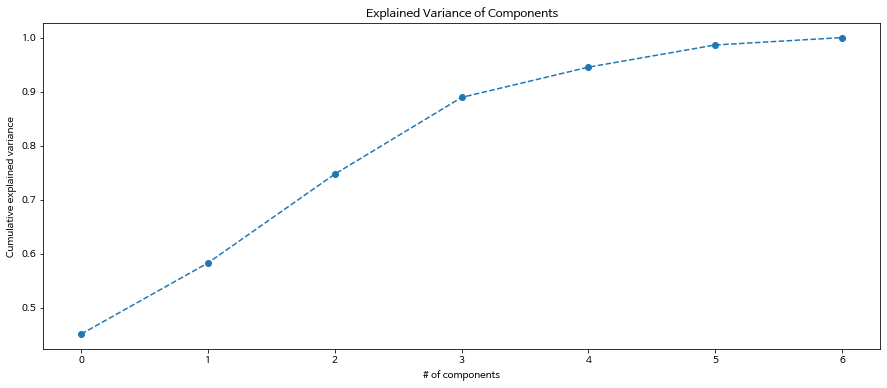

In [27]:
# cumulative variance plot 
plt.figure(figsize = (15,6))
plt.plot(range(0,np.cumsum([e for e in explained_variance_ratio if e !=0]).shape[0]), 
         np.cumsum([e for e in explained_variance_ratio if e !=0]), marker = 'o', linestyle = '--')

plt.title('Explained Variance of Components')
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## SPCA(n_component=3)

In [28]:
spca = SparsePCA(n_components = 3, alpha = 0.01)
pc = spca.fit_transform(X2_sc) # df 변수 확인 

explained_variance = np.var(pc, axis=0) # 설명변수 
explained_variance_ratio = explained_variance / np.sum(explained_variance) #누적 설명변수 

print("variance ratio(분산비율) : ", np.var(pc, axis=0))
print("culmulative variance ratio at SPC3 component : ", np.cumsum([e for e in explained_variance_ratio if e !=0]))


variance ratio(분산비율) :  [3.55430191 1.27279566 0.95399588]
culmulative variance ratio at SPC3 component :  [0.61481482 0.83498003 1.        ]


In [29]:
spca_col = ['spca_component_'+ str(x+1) for x in range(3) ]
f_spca = pd.DataFrame(pc, columns = spca_col)

In [30]:
spca_components = pd.DataFrame(spca.components_, columns = list(X2.columns)) 
spca_components

,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통
0,0.49,0.51,0.00,0.48,0.52,0.05,0.00
1,-0.25,0.10,0.76,0.13,-0.05,0.54,0.20
2,0.07,-0.05,-0.26,-0.04,0.00,0.11,0.95


In [31]:
# SPCA축의 가장 중요한 변수
n_pcs= spca.components_.shape[0]
most_important = [np.abs(spca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X2.columns # Xcolumns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

df_pca = pd.DataFrame(dic.items())
df_pca.columns = ['spca','element']
df_pca['value']=None
for i in range(len(df_pca)):
    a = df_pca['element'][i]
    df_pca['value'][i] = spca_components[a][i]
    
df_pca

,spca,element,value
0,PC1,디지털정보지수,0.52
1,PC2,행정동별시니어비율,0.76
2,PC3,대중교통,0.95


# K-MEANS Clustering 

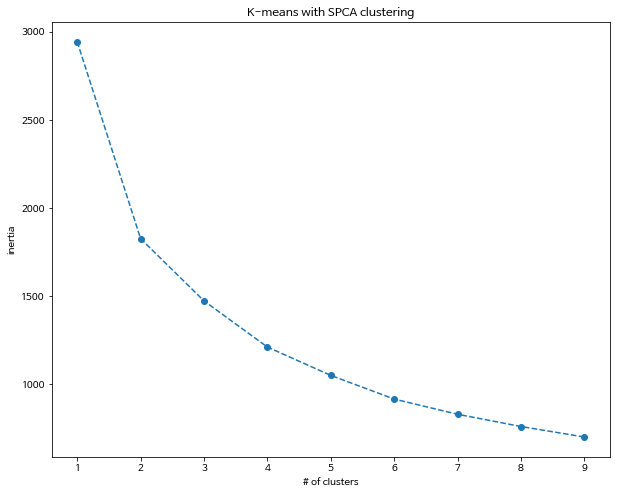

In [32]:
#K-means Clustering 
inertia = []
for i in range(1,10):
    kmeans_spca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_spca.fit(pc)
    inertia.append(kmeans_spca.inertia_)
    
# 최적의 Cluster 개수 찾기 (elbow point)
plt.figure(figsize = (10,8))
plt.plot(range(1,10), inertia, marker = 'o', linestyle = '--')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.title('K-means with SPCA clustering')
plt.show()

* inertia : k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있는데,이 거리의 제곱 합을 이너셔(intertia)라고 부른다.이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값이라고 생각할 수 있다.일반적으로 클러스터의 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에, 이너셔 또한 함께 줄어든다.

In [33]:
kmeans_spca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100)
kmeans_spca.fit(pc)

df['kmeans'] = kmeans_spca.labels_

kmeans_spca_df = pd.concat([df, f_spca], axis = 1)
kmeans_spca_df.head(3)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,종로구,청운효자동,청운효자동 주민센터,서울특별시 종로구 자하문로 92,37.58,126.97,1953680.41,953451.03,11978.00,2945.00,0.25,254736.24,2933.53,0.00,1.00,0,-1.83,-0.42,-0.43
1,종로구,사직동,사직동 주민센터,서울특별시 종로구 사직로9길 1,37.58,126.97,1952805.72,953286.59,9372.00,2468.00,0.26,213476.75,2406.94,3.00,1.00,0,-2.26,1.28,-0.27
2,종로구,종로1.2.3.4가동,종로1-4가동 주민센터,서울특별시 종로구 종로17길 8,37.57,126.99,1952189.71,955056.68,7197.00,2682.00,0.37,231987.30,2305.52,4.00,5.00,0,-2.18,4.00,1.63


In [34]:
# kmeans group 
group0 = kmeans_spca_df[kmeans_spca_df["kmeans"] == 0]
group1 = kmeans_spca_df[kmeans_spca_df["kmeans"] == 1]
group2 = kmeans_spca_df[kmeans_spca_df["kmeans"] == 2]
#group3 = kmeans_spca_df[kmeans_spca_df["kmeans"] == 3]

group0.shape, group1.shape, group2.shape#, group3.shape

((193, 19), (90, 19), (226, 19))

In [35]:
kmeans_spca_df['kmeans'].value_counts()

2    226
0    193
1     90
Name: kmeans, dtype: int64

In [36]:
cluster_mean = kmeans_spca_df.groupby('kmeans').mean()
cluster_mean

,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,spca_component_1,spca_component_2,spca_component_3
kmeans,,,,,,,,,,,,,,
0,37.55,127.00,1949435.51,955727.70,14995.19,3495.34,0.25,170566.52,3622.98,0.89,1.21,-1.79,-0.17,-0.17
1,37.56,126.98,1951149.01,954233.70,36330.28,9063.18,0.25,383048.07,9215.10,1.22,1.59,2.99,0.05,0.01
2,37.55,127.00,1950095.18,955596.03,24132.19,5984.88,0.25,265803.68,6112.48,1.15,1.79,0.34,0.13,0.14


In [37]:
cluster_mean.loc[:,'동별전체인구'].min()

14995.19170984456

In [38]:
cp_colunms = ['동별전체인구', '동별시니어수', '행정동별시니어비율', '유동인구', '디지털정보지수', '주변특성', '대중교통']

for c in cp_colunms:
    sang = cluster_mean.loc[:,c].max()
    ha = cluster_mean.loc[:,c].min()
    jung = cluster_mean.loc[:,c].median()
    for j in range(3):
        if cluster_mean.loc[:,c][j] == ha:
            cluster_mean.loc[:,c][j] = '하'
        elif cluster_mean.loc[:,c][j] == sang:
            cluster_mean.loc[:,c][j] = '상'
        elif cluster_mean.loc[:,c][j] == jung:
            cluster_mean.loc[:,c][j] = '중'
cluster_mean

,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,spca_component_1,spca_component_2,spca_component_3
kmeans,,,,,,,,,,,,,,
0,37.55,127.00,1949435.51,955727.70,하,하,하,하,하,하,하,-1.79,-0.17,-0.17
1,37.56,126.98,1951149.01,954233.70,상,상,중,상,상,상,중,2.99,0.05,0.01
2,37.55,127.00,1950095.18,955596.03,중,중,상,중,중,중,상,0.34,0.13,0.14


In [39]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def CompareGroups(target, n_clusters) : 
    
    '''
    ANOVA Test : 그룹 간의 평균의 차이가 유의미한지 검정
    Box Plot : 그룹 간의 차이 시각화 
    '''
    
    # ANOVA Test 
    anovamodel = ols(f'{target} ~ C(kmeans)', kmeans_spca_df[['kmeans', target, 'spca_component_1', 'spca_component_2', 'spca_component_3']]).fit()
    print(anova_lm(anovamodel), "\n")
    
    # Box Plot 
    #color_list = {n:c for n,c in color_list.items() if n < n_clusters}
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='kmeans', y=target, 
                data=kmeans_spca_df[['kmeans', target, 'spca_component_1', 'spca_component_2', 'spca_component_3']])

    plt.show()

* ols 함수: 
종속변수와 독립변수간의 회귀분석을 통해 .summary()로 확인할 수 있다.
ex) r2, F-statistic, coef, etc
* anova_lm 함수: 일원분산분석

              df  sum_sq  mean_sq    F  PR(>F)
C(kmeans)   2.00    0.01     0.01 2.23    0.11
Residual  506.00    1.22     0.00  NaN     NaN 



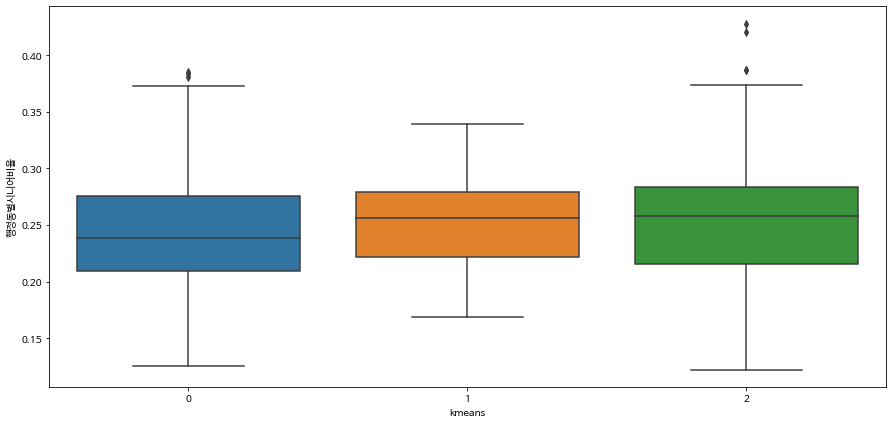

In [40]:
CompareGroups('행정동별시니어비율', 3) 

# 그래프

In [41]:
color_list = {0:"crimson", 1:"orange", 2:"green", 3:"royalblue", 4: "purple", 5: "dimgrey", 6: "gold"}

def ClusteringPlot( n_clusters, color_list) : 
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    color_list = {n:c for n,c in color_list.items() if n < n_clusters}
    ax.scatter(kmeans_spca_df['spca_component_1'], kmeans_spca_df['spca_component_2'], kmeans_spca_df['spca_component_3'],
               s=60, c = kmeans_spca_df['kmeans'].apply(lambda x: color_list[x]))
    
    # label the axes
    plt.title('spca & K-means Clustering', fontsize = 15)
    ax.set_xlabel("SPC1")
    ax.set_ylabel("SPC2")
    ax.set_zlabel("SPC3")
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_list.values()]
    plt.legend(markers, color_list.keys(), numpoints=1, bbox_to_anchor = (1.2,0.5))
    plt.show()

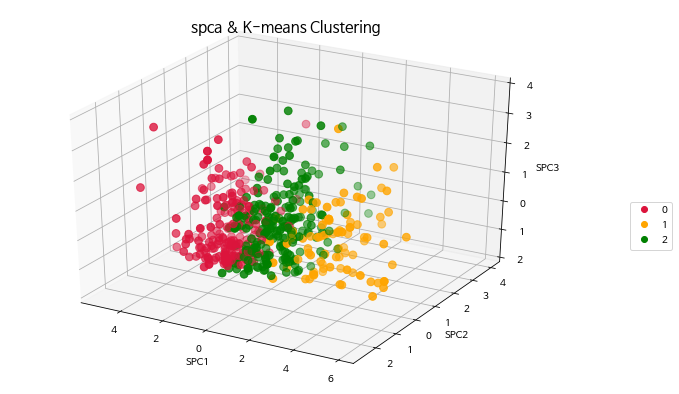

In [42]:
ClusteringPlot( 3, color_list)

## 1번 군집 추출

In [43]:
# df standard 한 것중 kmeans번만 index추출
dfclu2 = kmeans_spca_df[kmeans_spca_df['kmeans']==1]
dfclu2.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
80,동대문구,용신동,용신동 주민센터,서울특별시 동대문구 천호대로27길 35,37.58,127.04,1952731.88,959331.47,31619.00,8144.00,0.26,417600.62,7787.33,2.00,3.00,1,2.44,0.80,0.89


In [44]:
dfclu2.shape

(90, 19)

In [45]:
dfclu2['자치구'].value_counts()

강서구     10
노원구      9
은평구      9
강동구      6
중랑구      5
금천구      5
동작구      5
동대문구     5
강북구      4
성북구      4
서대문구     4
구로구      4
양천구      3
영등포구     3
서초구      3
강남구      3
도봉구      2
마포구      2
관악구      2
송파구      2
Name: 자치구, dtype: int64

## 최종고려변수 : 1순위 대중교통, 2순위 연면적, 3순위 주변특성, 4순위 유동인구

In [46]:
finalcenter = pd.read_excel('/content/drive/MyDrive/main_seoul_senior_data_주말제외.xlsx', thousands=',')
finalcenter.head(1)

,자치구,동,시설명,주소,연면적,위도,경도,위도UTMK,경도UTMK,도서관(500),...,병원(500),공원(500),버스(100),지하철(250),동별전체인구,60세~,60세~/전체인구,60세~/구별전체,비율,디지털정보지수
0,종로구,청운효자동,청운효자동 주민센터,서울특별시 종로구 자하문로 92,965.52,37.58,126.97,1953680.41,953451.03,0.00,...,0.00,0.00,1.00,0.00,11978.00,2945.00,0.25,0.08,254736.24,2933.53


## 강서구 시작

In [47]:
# 강서구 추출.
dfganeseo = dfclu2[dfclu2['자치구']=='강서구']
dfganeseo['시설명'].head(10)

240     염창동 주민센터
243    등촌3동 주민센터
244    우장산동 주민센터
245    화곡1동 주민센터
251    화곡본동 주민센터
255    발산1동 주민센터
257    방화1동 주민센터
474    강서노인종합복지관
475    화곡어르신복지센터
477    봉제산노인복지센터
Name: 시설명, dtype: object

In [48]:
# 인덱스 조정 작업.(240 -> 0)
dfganeseo = dfganeseo.reset_index()
gangseo = dfganeseo.iloc[:,1:]
gangseo.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,강서구,염창동,염창동 주민센터,서울특별시 강서구 양천로67가길 63,37.55,126.87,1950334.30,944651.04,41637.00,7029.00,0.17,277465.48,8687.28,0.00,2.00,1,2.07,-2.18,0.78


In [49]:
# 강서구중 각 주민센터(입지선정)과 다른 주민센터와의 거리합.
distance = []
distance2 = []
for i in range(len(gangseo)):
    for j in range(len(gangseo)):
        distance.append(np.sqrt((gangseo['위도UTMK'][i] - gangseo['위도UTMK'][j])**2 + (gangseo['경도UTMK'][i] - gangseo['경도UTMK'][j])**2))
    distance2.append(sum(distance))
    distance= []
distance2

[27515.78599654559,
 17958.050510913534,
 14869.588329678367,
 23326.37616545804,
 15426.608568645703,
 17863.438642995785,
 35914.96755189467,
 17477.463035168814,
 20261.600586261222,
 17487.41326213875]

In [50]:
# 강서구의 인구 * 거리 값.
# ex) 1행은 염창동 주민센터에서 각 주민센터마다의 거리 * 염창동의 동별시니어수.
# p median 식이 수요 * 거리곱의 최소화. 
gangseopopdist = gangseo['동별시니어수']*distance2
print(gangseopopdist.sort_values())
a = gangseopopdist.argmin()
gangseo.iloc[a:a+1:]

4   113863797.85
2   128681417.41
9   129074597.29
5   129081207.63
7   171803461.64
1   176527636.52
0   193408459.77
8   250777830.46
3   288710557.80
6   356815202.63
Name: 동별시니어수, dtype: float64


,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
4,강서구,화곡본동,화곡본동 주민센터,서울특별시 강서구 초록마을로5길 29,37.54,126.85,1949313.09,942559.17,34202.00,7381.00,0.22,291360.47,7706.07,1.00,0.00,1,1.66,-0.95,-0.71


### 화곡본동 주민센터는 대중교통 0 이라 패스

In [51]:
gangseo.iloc[2:3,:]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
2,강서구,우장산동,우장산동 주민센터,서울특별시 강서구 우현로 34,37.55,126.84,1949788.78,942044.36,42923.00,8654.00,0.20,341611.37,9995.12,1.00,2.00,1,3.19,-1.08,0.63


In [52]:
# 강서 유동인구 평균
gangseo['유동인구'].mean()

363243.33109745494

###강서구 연면적 평균 = 1944, 강서구 우장산동주민센터의 연면적 = 4104, 주변특성 1, 대중교통 2 = 우장산동주민센터 채택

## 강서구는 우장산동 주민센터

## 노원구 시작

In [53]:
# 노원구 추출.
dfnowon = dfclu2[dfclu2['자치구']=='노원구']
dfnowon['시설명'].head(10)

158      월계2동 주민센터
159      월계3동 주민센터
160      공릉1동 주민센터
161      공릉2동 주민센터
165      상계1동 주민센터
167     상계3.4동주민센터
169     상계6.7동주민센터
173    중계2.3동 주민센터
454      공릉어르신복지센터
Name: 시설명, dtype: object

In [54]:
# 인덱스 조정 작업.(158 -> 0)
dfnowon = dfnowon.reset_index()
nowon = dfnowon.iloc[:,1:]
nowon.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,노원구,월계2동,월계2동 주민센터,서울특별시 노원구 초안산로5길 28,37.63,127.05,1958993.28,960436.12,26568.00,8264.00,0.31,340395.92,7618.33,0.00,0.00,1,1.65,0.35,-1.44


In [55]:
# 노원구중 각 주민센터(입지선정)과 다른 주민센터와의 거리합.
distance = []
distance2 = []
for i in range(len(nowon)):
    for j in range(len(nowon)):
        distance.append(np.sqrt((nowon['위도UTMK'][i] - nowon['위도UTMK'][j])**2 + (nowon['경도UTMK'][i] - nowon['경도UTMK'][j])**2))
    distance2.append(sum(distance))
    distance= []
distance2

[24363.086066554122,
 19850.795785409227,
 24399.480471168845,
 29397.691717870286,
 37615.959315089676,
 33381.94179221746,
 20624.980506095824,
 17644.772127993638,
 17692.366804655736]

In [56]:
# 노원구의 인구 * 거리 값.
# p median 식이 수요 * 거리곱의 최소화. 
nowonpopdist = nowon['동별시니어수']*distance2
print(nowonpopdist.sort_values())
a = nowonpopdist.argmin()
nowon.iloc[a:a+1:]

8   146492797.14
6   153284855.12
1   172185802.64
7   178688607.34
0   201336543.25
2   235747780.31
3   243412887.42
5   285115164.85
4   400722814.58
Name: 동별시니어수, dtype: float64


,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
8,노원구,공릉2동,공릉어르신복지센터,서울특별시 노원구 공릉로 129,37.65,127.07,1960419.95,961966.63,40374.00,8280.00,0.21,341054.97,9554.74,2.00,3.00,1,2.92,-0.38,1.30


### 노원구 9개 행 연면적 평균은 1520 이고, 공릉어르신복지센터는 584라서 부적절

In [57]:
nowon.iloc[6:7]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
6,노원구,상계6.7동,상계6.7동주민센터,서울특별시 노원구 노원로 429,37.65,127.07,1961488.88,961996.78,32641.00,7432.00,0.23,306125.67,8382.82,1.00,3.00,1,1.83,-0.37,1.05


### 노원구 9개 행 연면적 평균은 1520 이고, 상계6.7 주민센터는 653 이라서 부적절

In [58]:
nowon.iloc[1:2]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
1,노원구,월계3동,월계3동 주민센터,서울특별시 노원구 마들로 57,37.63,127.06,1959213.35,961372.55,29885.00,8674.00,0.29,357283.91,7956.12,0.00,2.00,1,2.09,0.21,-0.08


### 월계 3동 주민센터는 대중교통은 2 이지만, 연면적이 650 - 평균이 1520 이라 기각

In [59]:
nowon.iloc[7:8]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
7,노원구,중계2.3동,중계2.3동 주민센터,서울특별시 노원구 노원로17길 56,37.64,127.07,1960076.42,962139.41,34196.00,10127.00,0.30,417133.29,9232.26,3.00,2.00,1,3.40,1.75,0.12


In [60]:
# 노원구 유동인구 평균
nowon['유동인구'].mean()

365737.05765581736

### 노원구 연면적 평균 = 1520, 노원구 중계2.3동 주민센터의 연면적 = 2695, 주변특성 3, 대중교통 2 = 중계2.3동 주민센터 채택

## 노원구는 중계 2,3동 주민센터

## 은평구 시작

In [61]:
# 은평구 추출.
dfeunpyeong = dfclu2[dfclu2['자치구']=='은평구']
dfeunpyeong['시설명'].head(10)

177     녹번동 주민센터
178    불광1동 주민센터
179    불광2동 주민센터
182     구산동 주민센터
187     역촌동 주민센터
191     진관동 주민센터
455    은평노인종합복지관
456     역촌노인복지센터
459      불광노인복지관
Name: 시설명, dtype: object

In [62]:
# 인덱스 조정 작업.(177 -> 0)
dfeunpyeong = dfeunpyeong.reset_index()
eunpyeong = dfeunpyeong.iloc[:,1:]
eunpyeong.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,은평구,녹번동,녹번동 주민센터,서울특별시 은평구 은평로 195,37.60,126.92,1955373.67,948630.70,36807.00,9958.00,0.27,355828.24,9604.62,1.00,3.00,1,3.16,0.35,0.77


In [63]:
# 은평구중 각 주민센터(입지선정)과 다른 주민센터와의 거리합.
distance = []
distance2 = []
for i in range(len(eunpyeong)):
    for j in range(len(eunpyeong)):
        distance.append(np.sqrt((eunpyeong['위도UTMK'][i] - eunpyeong['위도UTMK'][j])**2 + (eunpyeong['경도UTMK'][i] - eunpyeong['경도UTMK'][j])**2))
    distance2.append(sum(distance))
    distance= []
distance2

[18426.402158579804,
 15456.583004808484,
 14859.887945396566,
 14406.64236864476,
 12942.498076387405,
 19841.643147713665,
 18573.972502219378,
 16007.81138718356,
 12523.494134629751]

In [64]:
# 은평구의 인구 * 거리 값.
# p median 식이 수요 * 거리곱의 최소화. 
eunpyeongpopdist = eunpyeong['동별시니어수']*distance2
print(eunpyeongpopdist.sort_values())
a = eunpyeongpopdist.argmin()
eunpyeong.iloc[a:a+1:]

8   106787834.49
2   126710264.51
3   128391996.79
4   156371261.76
1   170439740.79
0   183490112.70
7   193406377.18
6   222980539.89
5   238198925.99
Name: 동별시니어수, dtype: float64


,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
8,은평구,불광2동,불광노인복지관,서울특별시 은평구 연서로32길 17-11,37.62,126.92,1957609.21,949365.48,27545.00,8527.00,0.31,304694.46,7905.73,3.00,0.00,1,1.80,1.70,-1.16


### 불광노인복지관, 대중교통 0 이라 기각.

In [65]:
eunpyeong.iloc[2:3]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
2,은평구,불광2동,불광2동 주민센터,서울특별시 은평구 연서로41길 16,37.63,126.93,1958396.03,949647.22,27545.00,8527.00,0.31,304694.46,7905.73,1.00,0.00,1,1.69,0.74,-1.33


### 불광2동 주민센터 대중교통 0 이라 기각.

In [66]:
eunpyeong.iloc[3:4]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
3,은평구,구산동,구산동 주민센터,서울특별시 은평구 갈현로17길 10,37.61,126.91,1956718.85,948118.84,32207.00,8912.00,0.28,318451.62,8919.75,1.00,0.00,1,2.33,0.13,-1.12


### 구산동 주민센터 대중교통 0 이라 기각.

In [67]:
eunpyeong.iloc[4:5]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
4,은평구,역촌동,역촌동 주민센터,서울특별시 은평구 연서로 59,37.61,126.92,1956517.60,948662.18,45384.00,12082.00,0.27,431724.92,12093.22,1.00,2.00,1,5.05,0.09,0.17


In [68]:
# 은평구 유동인구 평균
eunpyeong['유동인구'].mean()

377676.92242468096

###은평구 연면적 평균 = 2221, 은평구 역촌동주민센터의 연면적 = 1812, 주변특성 1, 대중교통 2 = 역촌동 주민센터 채택

## 은평구는 역촌동 주민센터

## 강동구 시작

In [69]:
# 강동구 추출.
dfrivereast = dfclu2[dfclu2['자치구']=='강동구']
dfrivereast['시설명'].head(10)

410     상일동 주민센터
411      길동 주민센터
414    암사1동 주민센터
421    천호2동 주민센터
423     강일동 주민센터
504      해공노인복지관
Name: 시설명, dtype: object

In [70]:
# 인덱스 조정 작업.(410 -> 0)
dfrivereast = dfrivereast.reset_index()
rivereast = dfrivereast.iloc[:,1:]
rivereast.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,강동구,상일1동,상일동 주민센터,서울 강동구 구천면로 633,37.55,127.17,1949897.14,970898.01,38834.00,7184.00,0.18,300485.83,10692.29,0.00,2.00,1,2.53,-1.85,0.66


In [71]:
# 강동구중 각 주민센터(입지선정)과 다른 주민센터와의 거리합.
distance = []
distance2 = []
for i in range(len(rivereast)):
    for j in range(len(rivereast)):
        distance.append(np.sqrt((rivereast['위도UTMK'][i] - rivereast['위도UTMK'][j])**2 + (rivereast['경도UTMK'][i] - rivereast['경도UTMK'][j])**2))
    distance2.append(sum(distance))
    distance= []
distance2

[14595.606399238335,
 11429.055617750884,
 10814.987897951341,
 13151.196090412708,
 18868.076276636464,
 10513.878891486023]

In [72]:
# 강동구의 인구 * 거리 값.
# p median 식이 수요 * 거리곱의 최소화. 
rivereastpopdist = rivereast['동별시니어수']*distance2
print(rivereastpopdist.sort_values())
a = rivereastpopdist.argmin()
rivereast.iloc[a:a+1:]

5    91407663.08
2    97562005.83
0   104854836.37
3   114336498.81
1   138885883.87
4   148378551.84
Name: 동별시니어수, dtype: float64


,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
5,강동구,천호2동,해공노인복지관,서울특별시 강동구 천중로17길 42-16,37.55,127.13,1949452.26,967593.32,33154.00,8694.00,0.26,363644.74,8661.42,3.00,0.00,1,2.60,0.90,-0.88


### 해공노인복지관은 대중교통 0 이라 기각.

In [73]:
rivereast.iloc[2:3]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
2,강동구,암사1동,암사1동 주민센터,서울특별시 강동구 올림픽로98가길 57,37.55,127.13,1949919.44,967655.77,34486.00,9021.00,0.26,377322.19,9359.65,3.00,0.00,1,2.98,0.87,-0.87


### 암사1동 주민센터도 대중교통 0 이라 기각

In [74]:
rivereast.iloc[0:1]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,강동구,상일1동,상일동 주민센터,서울 강동구 구천면로 633,37.55,127.17,1949897.14,970898.01,38834.00,7184.00,0.18,300485.83,10692.29,0.00,2.00,1,2.53,-1.85,0.66


### 상일1동 주민센터는 주변특성 0 이라 기각

In [75]:
rivereast.iloc[3:4]

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
3,강동구,천호2동,천호2동 주민센터,서울특별시 강동구 올림픽로 698,37.54,127.12,1948866.39,967003.02,33154.00,8694.00,0.26,363644.74,8661.42,3.00,1.00,1,2.61,1.01,-0.26


In [76]:
# 강동구 유동인구
rivereast['유동인구'].mean()

374740.04885445815

###강동구 연면적 평균 = 2097, 강동구 천호2동 주민센터의 연면적은 = 2707, 주변특성 3, 대중교통 1 = 천호2동 주민센터 채택

## 강동구는 천호2동 주민센터

## 중랑구 시작

In [77]:
# 중랑구 추출.
dfeastbigdoor = dfclu2[dfclu2['자치구']=='중랑구']
dfeastbigdoor['시설명'].head(10)

99     면목본동 주민센터
104     묵1동 주민센터
107    망우본동 주민센터
108    신내1동 주민센터
440     신내경로복지센터
Name: 시설명, dtype: object

In [78]:
# 인덱스 조정 작업.(99 -> 0)
dfeastbigdoor = dfeastbigdoor.reset_index()
jungbigdoor = dfeastbigdoor.iloc[:,1:]
jungbigdoor.head(1)

,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
0,중랑구,면목본동,면목본동 주민센터,서울특별시 중랑구 면목로 397,37.59,127.09,1953992.79,963770.76,33478.00,9020.00,0.27,365179.84,9532.94,1.00,2.00,1,2.80,0.27,0.14


In [79]:
# 중랑구중 각 주민센터(입지선정)과 다른 주민센터와의 거리합.
distance = []
distance2 = []
for i in range(len(jungbigdoor)):
    for j in range(len(jungbigdoor)):
        distance.append(np.sqrt((jungbigdoor['위도UTMK'][i] - jungbigdoor['위도UTMK'][j])**2 + (jungbigdoor['경도UTMK'][i] - jungbigdoor['경도UTMK'][j])**2))
    distance2.append(sum(distance))
    distance= []
distance2

[9162.186342895982,
 9759.024204309992,
 5171.973835502684,
 5428.309865784449,
 4878.473489673794]

In [80]:
# 중랑구의 인구 * 거리 값.
# p median 식이 수요 * 거리곱의 최소화. 
jungbigdoorpopdist = jungbigdoor['동별시니어수']*distance2
print(jungbigdoorpopdist.sort_values())
a = jungbigdoorpopdist.argmin()
jungbigdoor.iloc[a:a+1:]

2   48254515.89
4   49740915.70
3   55347047.39
0   82642920.81
1   84893751.55
Name: 동별시니어수, dtype: float64


,자치구,동,시설명,주소,위도,경도,위도UTMK,경도UTMK,동별전체인구,동별시니어수,행정동별시니어비율,유동인구,디지털정보지수,주변특성,대중교통,kmeans,spca_component_1,spca_component_2,spca_component_3
2,중랑구,망우본동,망우본동 주민센터,서울특별시 중랑구 망우로67길 10,37.60,127.10,1955452.17,965013.49,32155.00,9330.00,0.29,377730.37,9492.40,4.00,3.00,1,3.02,2.21,0.87


In [81]:
# 중랑구 유동인구
jungbigdoor['유동인구'].mean()

384135.18224265304

###중랑구 연면적 평균 = 2207, 중랑구 망우본동주민센터의 연면적 = 4099, 주변특성 4, 대중교통 3 = 망우본동 주민센터 채택

## 중랑구는 망우본동 주민센터